In [ ]:
install.packages("gapminder")
install.packages('ggplot2')

In [1]:
library(tidyverse)
library(readr)
data <- read_csv("data.csv")
data3 <- read_csv("data3.csv")
#head(data)
#glimpse(data)

── Attaching packages ──────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“Missing column names filled in: 'X1' [1]”
Warning message:
“Duplicated column names deduplicated: 'Date' => 'Date_1' [156]”

── Column specification ─────────────────────────────────────────────
cols(
  .default = col_double(),
  bitcoin_Cash_Direction = col_character(),
  bitcoin_Direction = col_character(),
  bitconnect_Direction = col_character(),
  Date = col_character(),
  dash_Direction = col_character(),
  ethereum_classic_Direction = col_character(),
  ethereum_Direction = col_character(),
  iota_Direction = col_character(),
  litecoin_Direction = col_character(),
  monero_Direction = col_character(),
 

In [2]:
price <- read_csv("price.csv")
#head(data)
#glimpse(price)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ─────────────────────────────────────────────
cols(
  .default = col_double(),
  Date = col_character(),
  Name = col_character(),
  Month_Name = col_character(),
  New_date1 = col_date(format = ""),
  Direction = col_character()
)
ℹ Use `spec()` for the full column specifications.




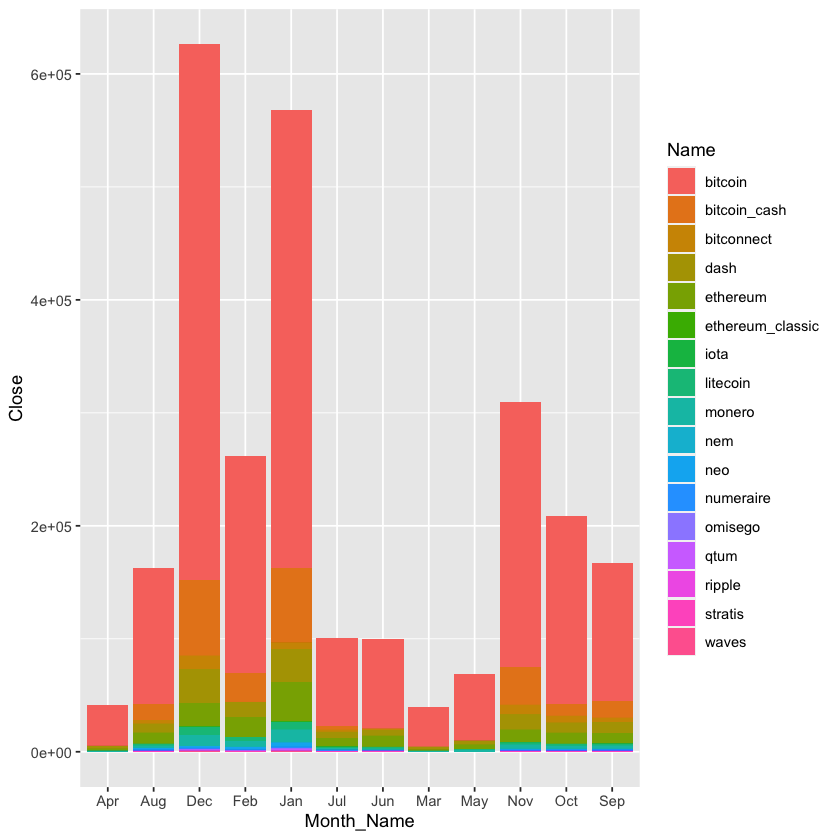

In [3]:
ggplot(price)+
  aes(x = Month_Name,
      y = Close,
      fill = Name)+ 
  geom_col(position = 'stack')

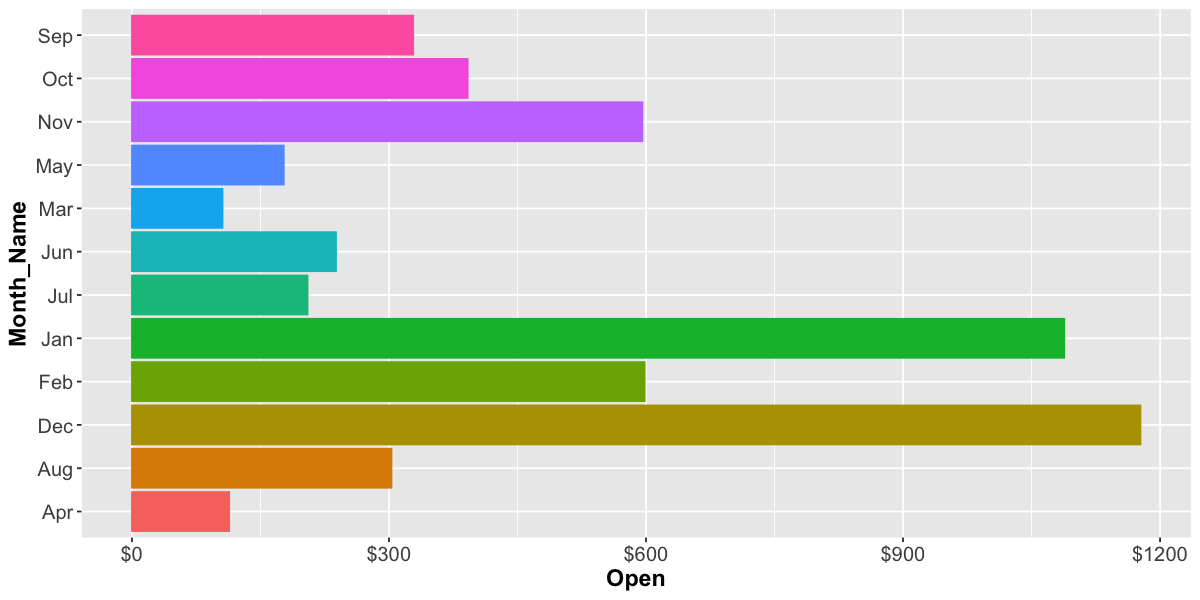

In [4]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(price ,aes(x=Open, y=Month_Name,color= Month_Name, fill=Month_Name))+ geom_bar(stat = "summary", fun = "mean") + 
scale_x_continuous(labels=function(x) paste0("$",x))  + 
                   theme(legend.position = "none", axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold")) 

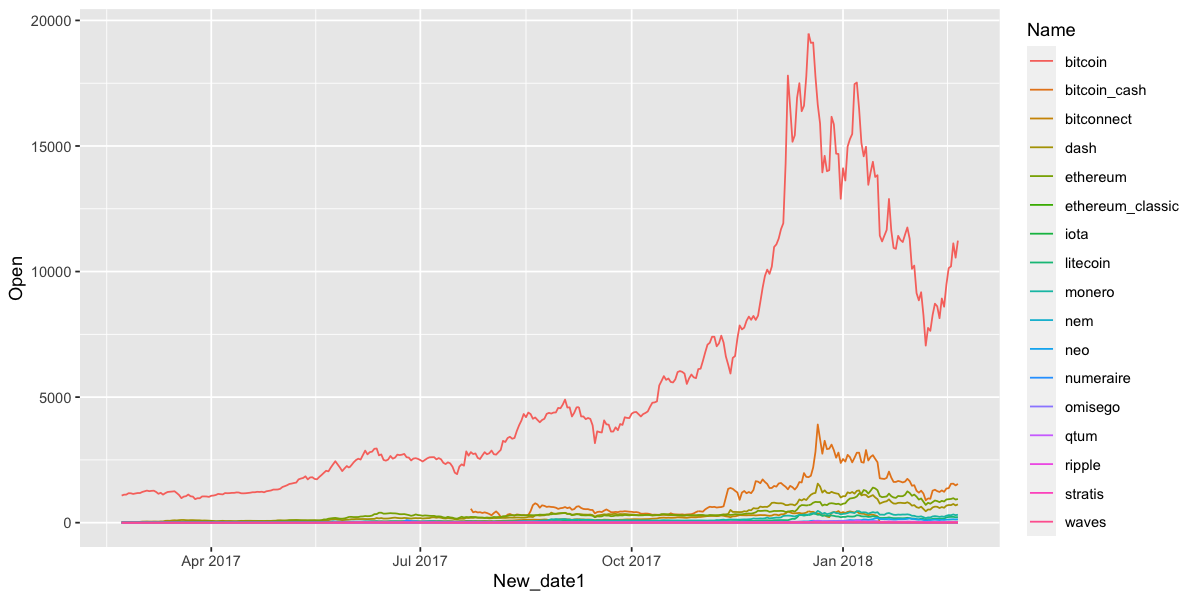

In [5]:
price_x <- subset(price, Name == 'bitcoin' | Name == 'neo')


crypto_chart <- ggplot(price,
                       aes(x = New_date1, 
                           y = Open, 
                           color= Name, 
                           fill= Name)) + 
                       geom_line()
crypto_chart <- crypto_chart
crypto_chart

Warning message:
“Missing column names filled in: 'X1' [1]”
Warning message:
“Duplicated column names deduplicated: 'Date' => 'Date_1' [3]”

── Column specification ─────────────────────────────────────────────
cols(
  .default = col_double(),
  Date = col_character(),
  Date_1 = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 152 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 152 rows containing missing values (geom_point).”


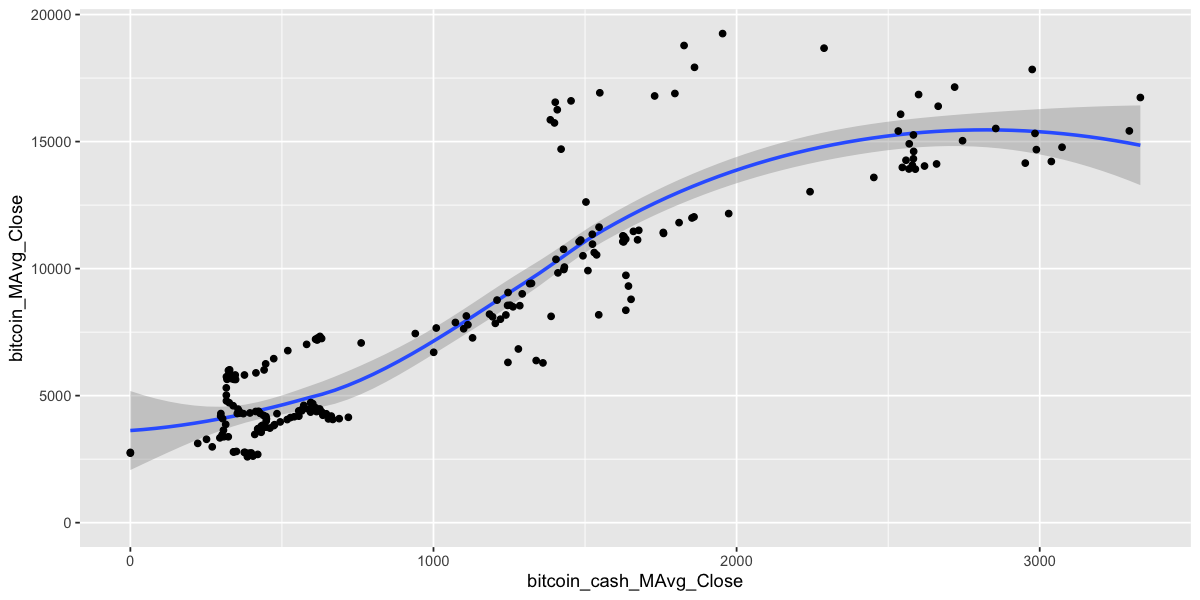

In [6]:
data3 <- read_csv("data3.csv")
ggplot(data3,aes(x=bitcoin_cash_MAvg_Close, y=bitcoin_MAvg_Close))+ geom_smooth()+ geom_point()

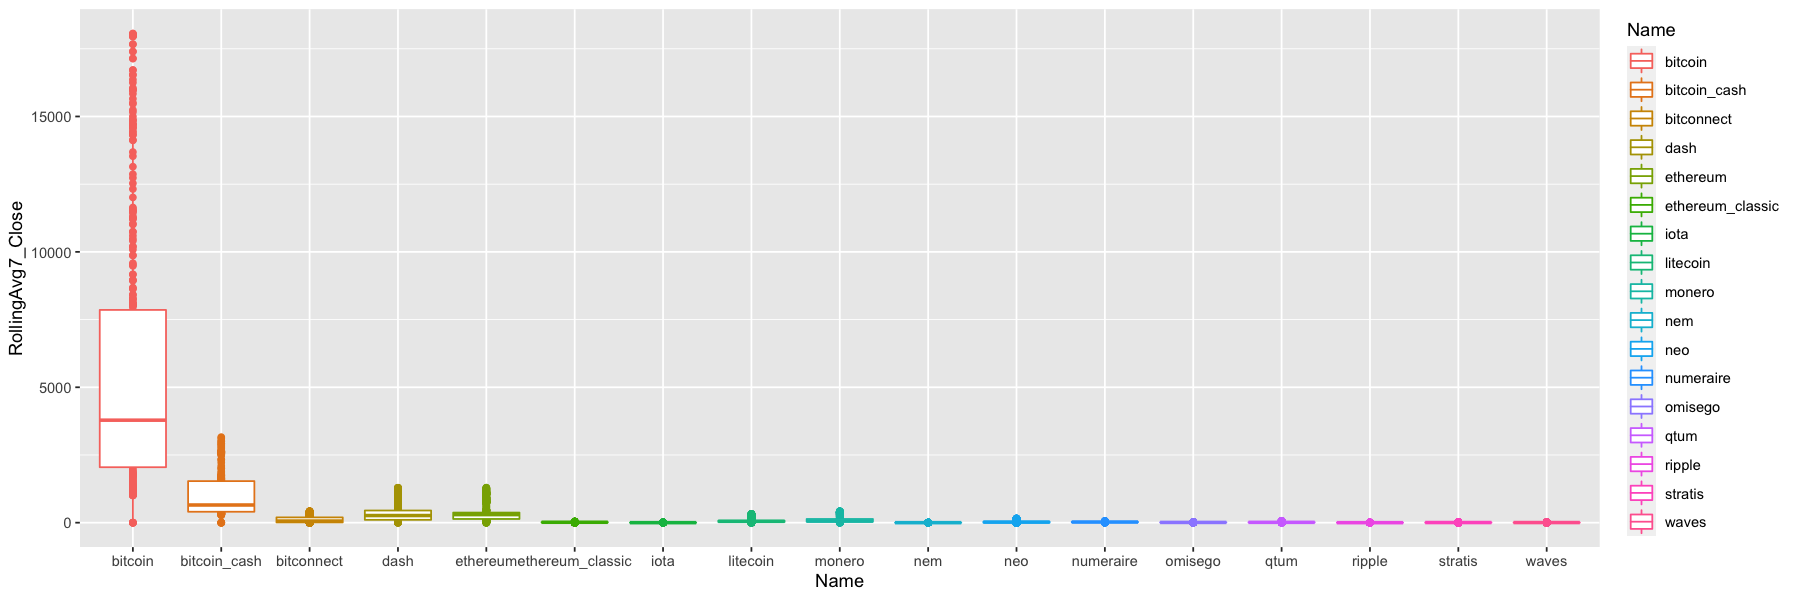

In [7]:
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(price,
  aes(Name, RollingAvg7_Close, color=Name)) +
  geom_point() + geom_boxplot()

In [8]:
library(ggplot2)
p <- ggplot(data=price, aes(x=New_date1, y=Volume,fill= Name, color=Name)) +
       geom_smooth()


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



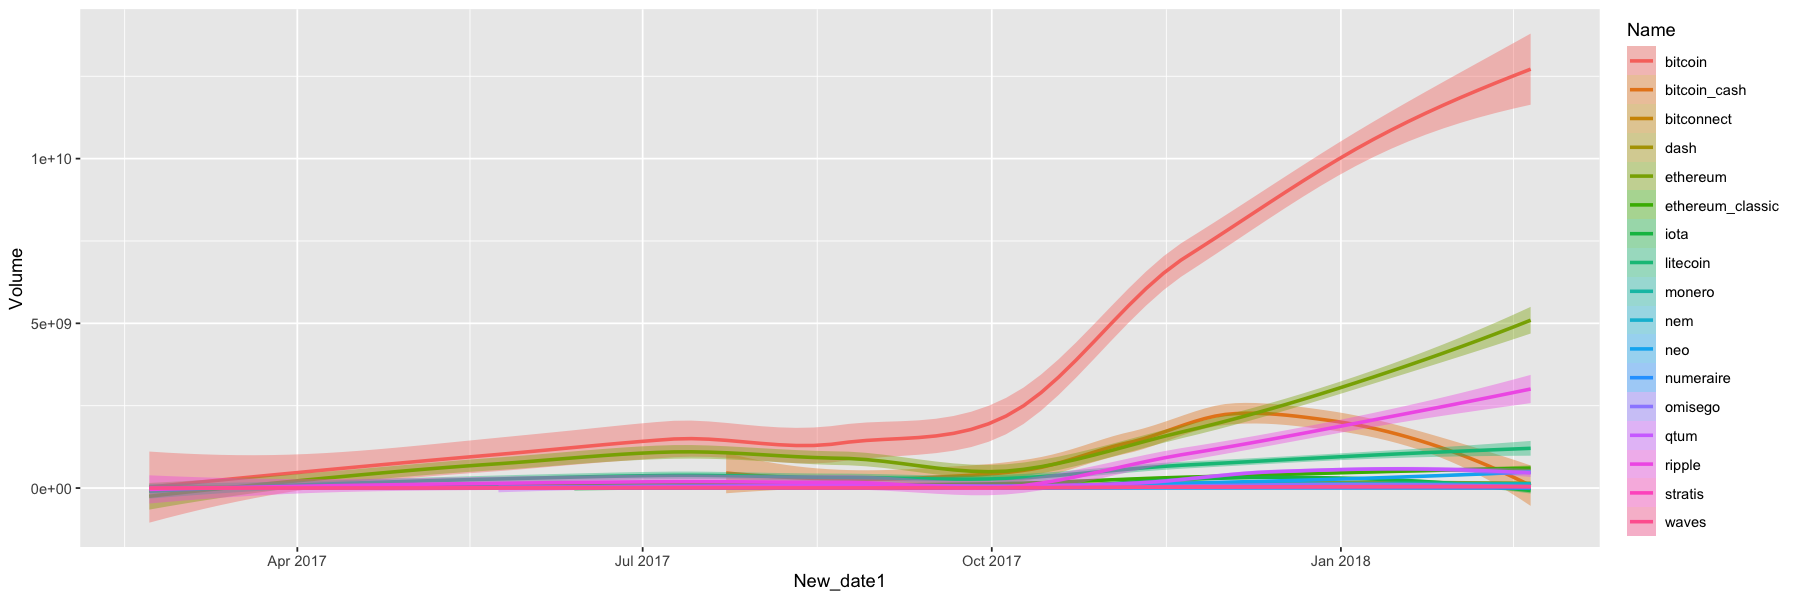

In [9]:
p

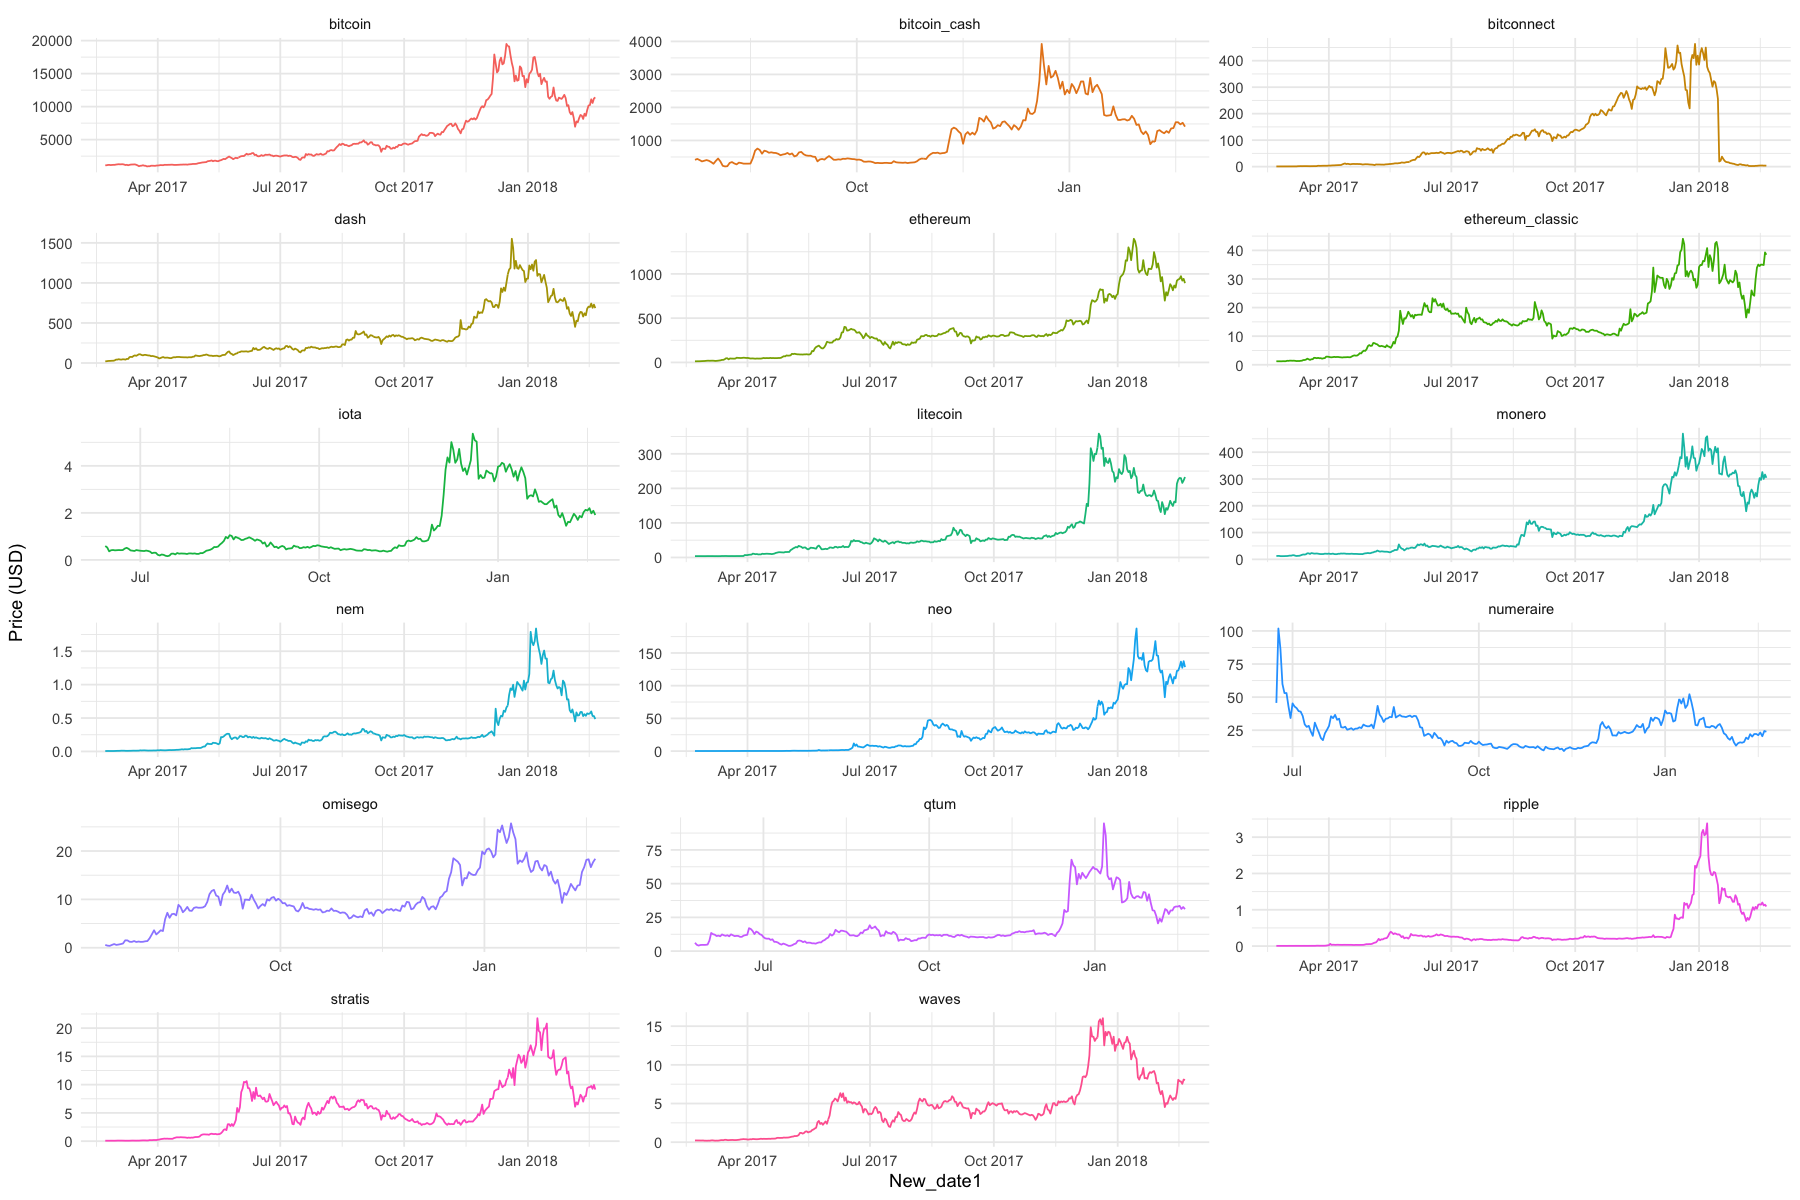

In [10]:
options(repr.plot.width = 15, repr.plot.height = 10)
p2 <- ggplot(price, aes(x = New_date1, y = Close, col = Name)) + geom_line()
p2 <- p2 + facet_wrap(~Name, scales = "free", ncol = 3) + theme_minimal() + theme(legend.position="none") + ylab("Price (USD)")
p2

In [11]:
library(corrplot)
# calculate the correlation matrix
M <- cor(data3[, -1], use = "complete.obs") # notice how we are ignoring missing data with the last argument
# plot the correlation matrix
corrplot.mixed(corr = M, upper = "ellipse", lower = "number", order = "AOE", tl.col = "black")

corrplot 0.84 loaded



ERROR: Error in cor(data3[, -1], use = "complete.obs"): 'x' must be numeric


In [ ]:
#install.packages("GGally")
library(GGally)
#ggcorr(data3[,], geom = "circle")

ggcorr(data3[, ], geom = "blank", label = TRUE, hjust = 0.75) +
  geom_point(size = 10, aes(color = coefficient > 0, alpha = abs(coefficient) > 0.5)) +
  scale_alpha_manual(values = c("TRUE" = 0.25, "FALSE" = 0)) +
  guides(color = FALSE, alpha = FALSE)

In [ ]:
ggplot(price) +
  aes(x = New_date1,
      y = Volume,color=Name) +
  geom_line() +
  geom_area()+
  geom_point(size = 2.5)+
    ggthemes::scale_fill_tableau()